 #### 上週作業

取出數學>60 且英文>85 的資料, 並以DataFrame的方式呈現

In [1]:
grade[(grade'Math']>60) & (grade'English']>85)]

SyntaxError: invalid syntax (<ipython-input-1-482c5c522383>, line 1)

計算各科的平均數

In [ ]:
grade.loc['各科平均'] = grade.mean(axis=0)
grade

In [ ]:
from IPython.disply import Image
Image(filename = "img/axis.jpg",wide = 600,height = 400)

新增性別資料
Gender = ['M','F','M','M']

In [ ]:
grade['Gender']=['M','F','M','M']
grade

性別的類別各出現幾次?

In [ ]:
grade['Grader'].value_counts()

算出每位同學的平均數，再用平均分數排名

In [2]:
grade['平均'] = grade.mean(axis=1).round(2) #小數點2位
grade['名次'] = grade['平均'].rank(ascending=False)
grade

NameError: name 'grade' is not defined

# 本週上課內容

In [3]:
import numpy as np
import pandas as pd

In [4]:
# Use this line to see plots in the notebook
%matplotlib inline

**Fake data csv files**

In [5]:
df1 = pd.read_csv('C:/Users/user/Downloads/df1',index_col=0)
df2 = pd.read_csv('C:/Users/user/Downloads/df2')
#打"\"不行，要打"/"

In [6]:
df1.head()

,A,B,C,D
2000-01-01,1.339091,-0.163643,-0.646443,1.041233
2000-01-02,-0.774984,0.137034,-0.882716,-2.253382
2000-01-03,-0.921037,-0.482943,-0.417100,0.478638
2000-01-04,-1.738808,-0.072973,0.056517,0.015085
2000-01-05,-0.905980,1.778576,0.381918,0.291436


In [7]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


**Histogram** 直方圖

<AxesSubplot:>

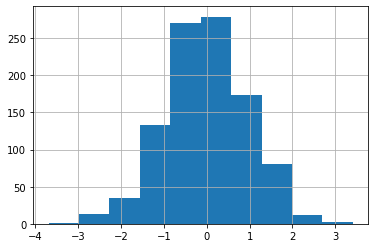

In [8]:
df1['A'].hist()

<AxesSubplot:ylabel='Frequency'>

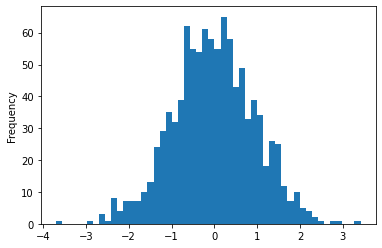

In [9]:
df1['A'].plot.hist(bins=50)

Barplot長條圖
DataFrame裡的列索引會在x軸，欄索引鍵會在y軸。

<AxesSubplot:>

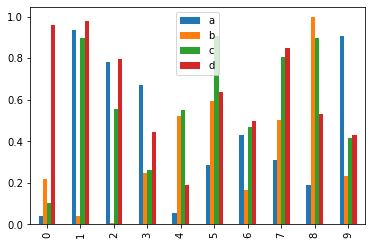

In [10]:
df2.plot.bar()

<AxesSubplot:>

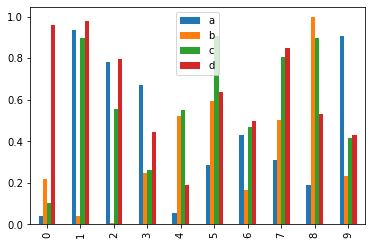

In [11]:
# alternative
df2.plot(kind='bar')

<AxesSubplot:>

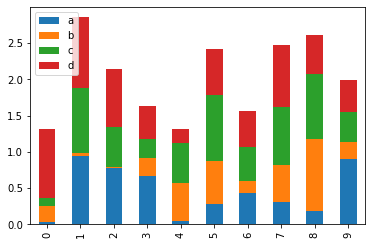

In [12]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

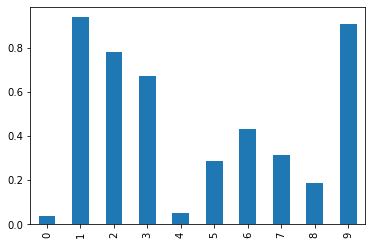

In [13]:
df2['a'].plot(kind='bar')

<AxesSubplot:>

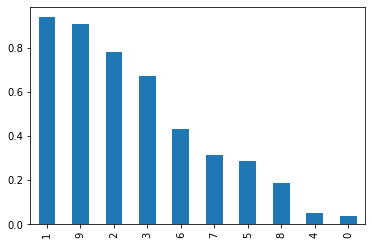

In [14]:
df2['a'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

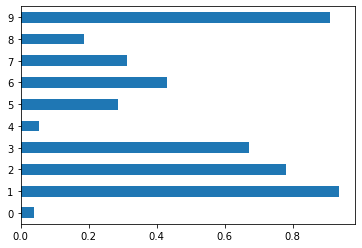

In [15]:
df2['a'].plot(kind='barh')

**Pie Chart**圓餅圖 <br/>
當資料用圓餅圖呈現時，可以看出它占總體的百分比。

<AxesSubplot:ylabel='b'>

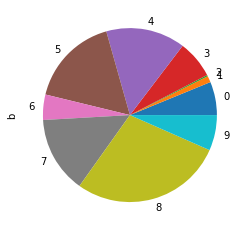

In [16]:
df2['b'].plot(kind='pie')

**BoxPlot**箱形圖 <br/>
中間箱子的兩端為第一四分位數（涵蓋25%之資料，Q1）與第三四分位數（涵蓋75%之資料，Q3），而箱子中間線為中位數（median）。<br/>
換言之，箱子涵蓋50%的資料。箱型外的圓圈，則是被判定成「異常值」。

<AxesSubplot:>

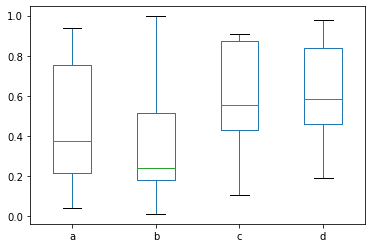

In [17]:
df2.plot.box()

Kernel Density Estimation plot (KDE)

**Kernel Density Estimation plot (KDE)**

<AxesSubplot:ylabel='Density'>

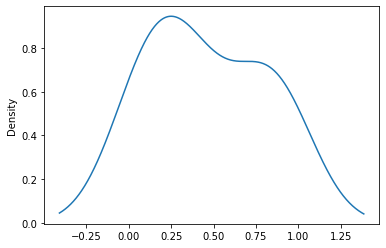

In [18]:
df2['a'].plot.kde()

**Line Plot**折線圖

<AxesSubplot:>

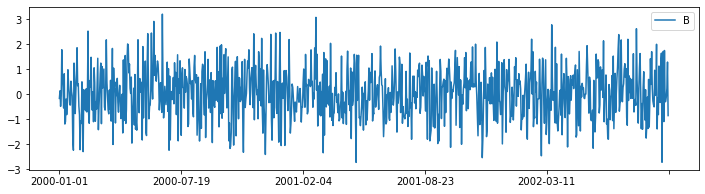

In [19]:
df1.plot.line(y='B',figsize=(12,3))
#資料圖的大小figsize=(12,3)

In [20]:
import seaborn as sns

**下載seaborn內建的資料集tips，這個資料集紀錄了餐廳客人給得小費以及相關的基本資料。**

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='smoker'>

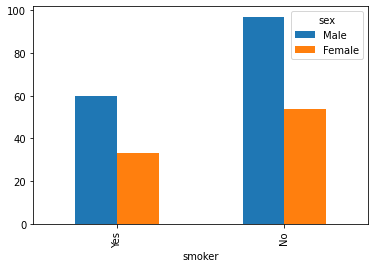

In [22]:
tips.groupby(['smoker','sex']).size().unstack(1).plot(kind='bar')

sex
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_bill, dtype: object

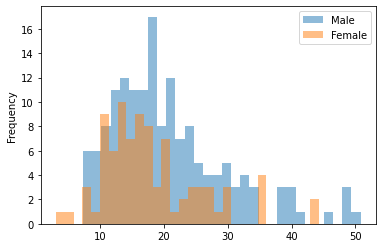

In [23]:
tips.groupby('sex')['total_bill'].plot(kind='hist', bins=30, alpha=0.5, legend=True) #alpha 是透明度的參數設定。

<AxesSubplot:title={'center':'total_bill'}, xlabel='sex'>

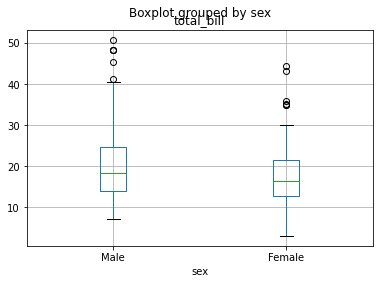

In [24]:
tips.boxplot(column='total_bill',by='sex')

**Scatter Plot**散佈圖

<AxesSubplot:xlabel='A', ylabel='B'>

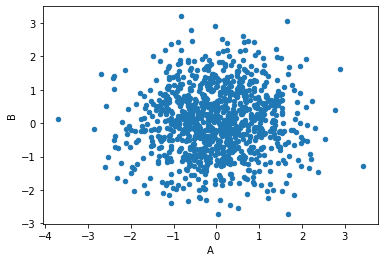

In [25]:
df1.plot.scatter(x='A',y='B')

<AxesSubplot:xlabel='A', ylabel='B'>

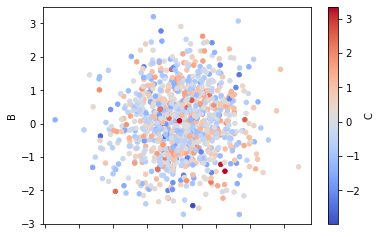

In [26]:
# color based off another column value
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

C:\Python\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='A', ylabel='B'>

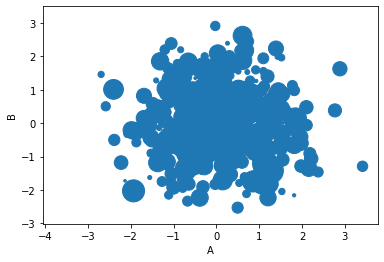

In [27]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200)

**Hexagonal Bin Plot**六邊箱圖(直譯)

<AxesSubplot:xlabel='a', ylabel='b'>

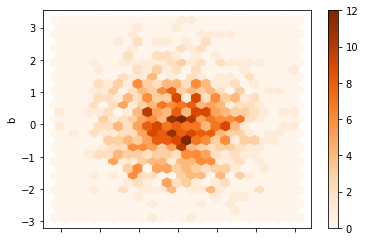

In [28]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

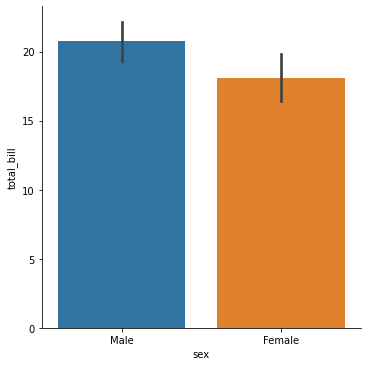

In [29]:
sns.catplot(x='sex',y='total_bill',data=tips, kind="bar")

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

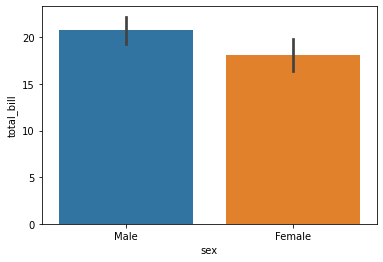

In [30]:
sns.barplot(x='sex',y='total_bill',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

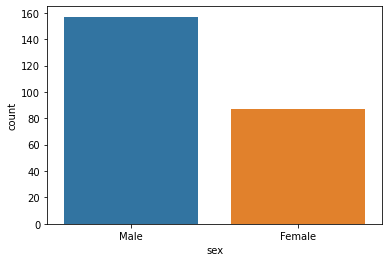

In [31]:
sns.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

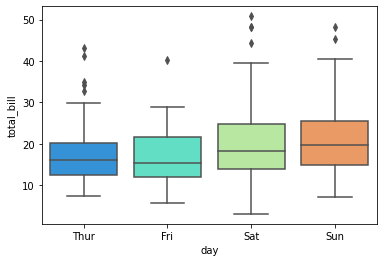

In [32]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

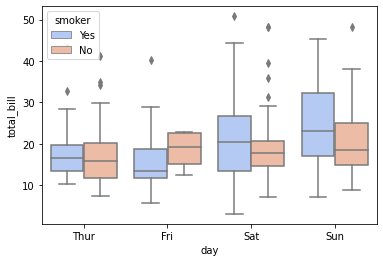

In [33]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

In [34]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

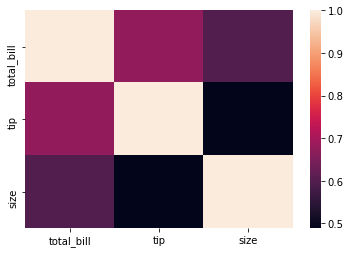

In [35]:
sns.heatmap(tips.corr())

<AxesSubplot:>

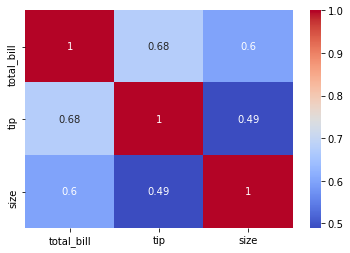

In [36]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

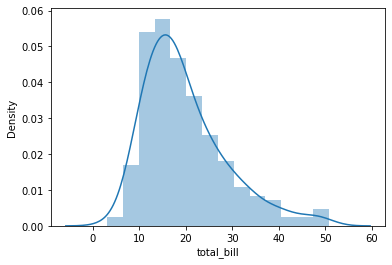

In [37]:
sns.distplot(tips['total_bill']) # Safe to ignore warnings

C:\Python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

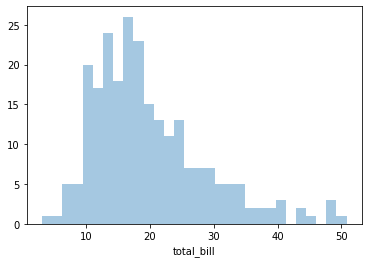

In [38]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

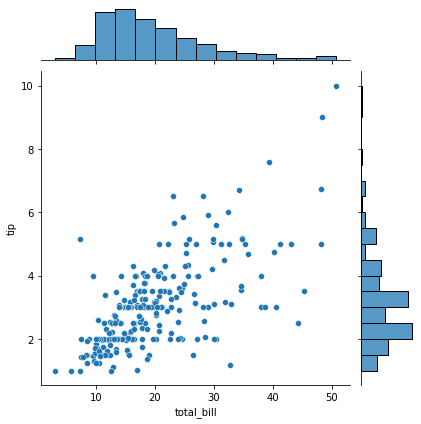

In [39]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

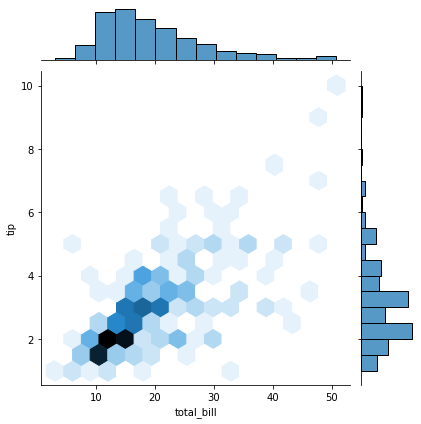

In [40]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

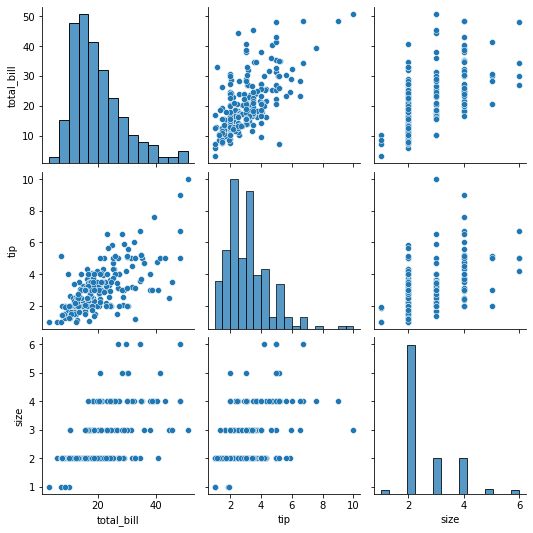

In [41]:
sns.pairplot(tips)

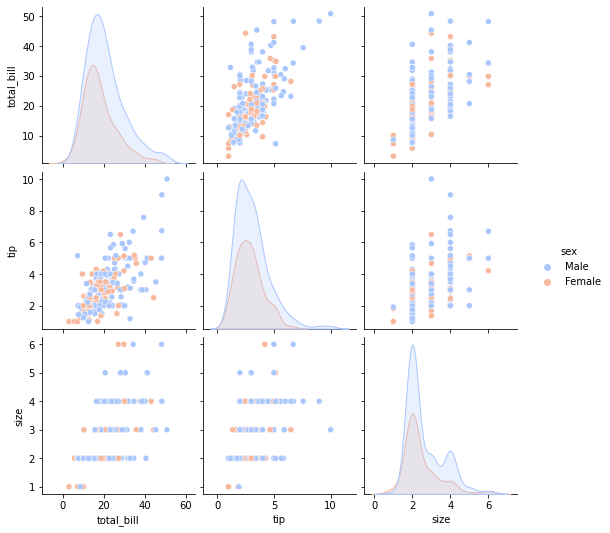

In [42]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

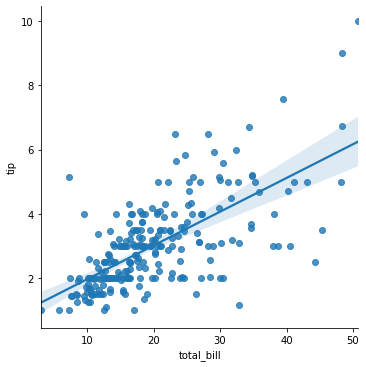

In [43]:
sns.lmplot(x='total_bill',y='tip',data=tips)

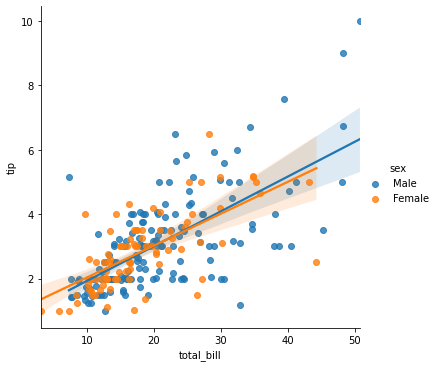

In [44]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

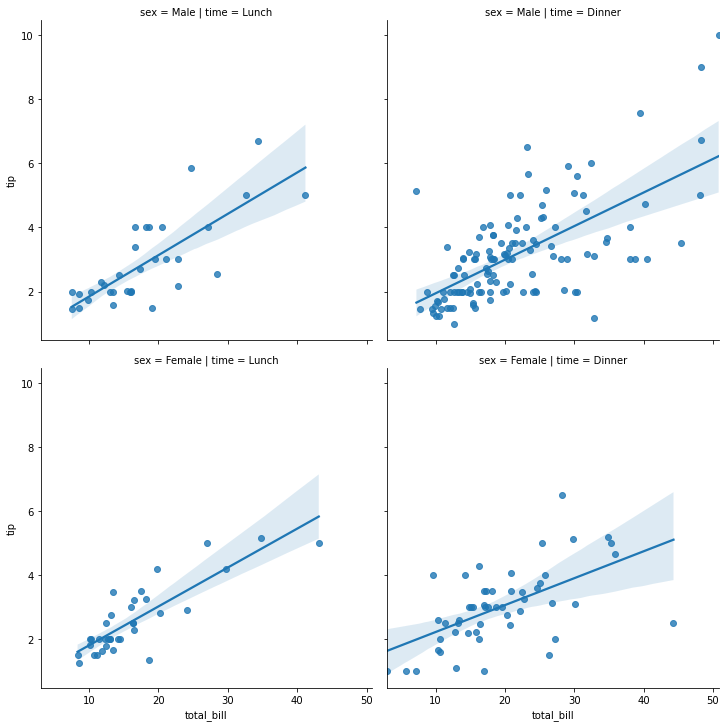

In [45]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

# Exercise
使用TITANIC的資料繪圖

In [46]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**繪製age的直方圖, 區間值設為30**

<AxesSubplot:ylabel='Frequency'>

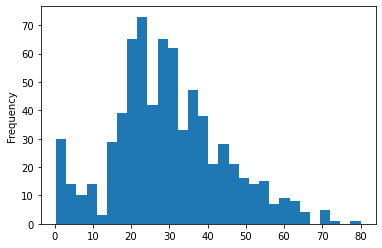

In [47]:
df['age'].plot.hist(bins=30)

**製作survived和sex的交叉表**

In [48]:
df.groupby(['survived','sex']).size().unstack(1)

sex,female,male
survived,,
0,81,468
1,233,109


<AxesSubplot:xlabel='survived'>

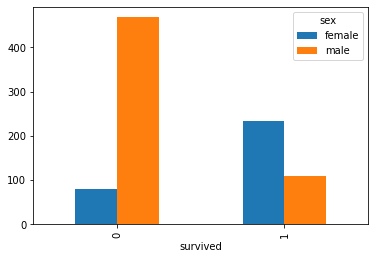

In [49]:
df.groupby(['survived','sex']).size().unstack(1).plot(kind='bar')

survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

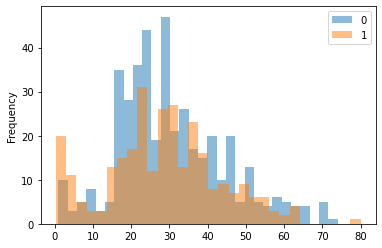

In [50]:
df.groupby('survived')['age'].plot(kind='hist', bins=30, alpha=0.5, legend=True)

<AxesSubplot:title={'center':'age'}, xlabel='survived'>

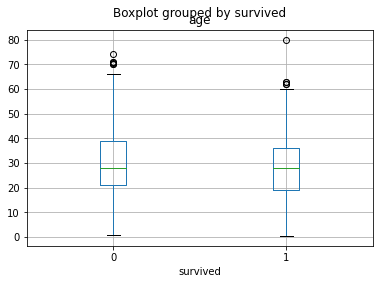

In [51]:
df.boxplot(column='age',by='survived')

**自由發揮, 至少再繪製3個不同的圖,並解釋其用意**

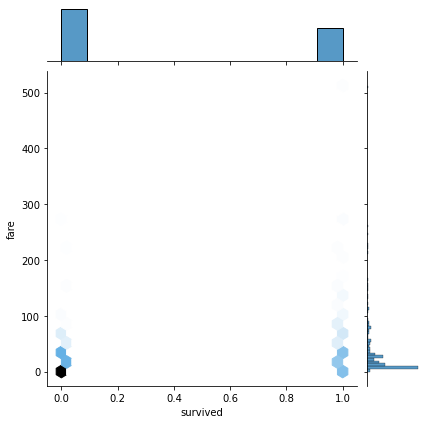

In [52]:
sns.jointplot(x='survived',y='fare',data=df,kind='hex')

In [53]:
df3 = df.groupby(['fare','survived']).size().unstack(1)
df3

survived,0,1
fare,,
0.0000,14.0,1.0
4.0125,1.0,NaN
5.0000,1.0,NaN
6.2375,1.0,NaN
6.4375,1.0,NaN
...,...,...
227.5250,1.0,3.0
247.5208,1.0,1.0
262.3750,NaN,2.0


<AxesSubplot:xlabel='survived', ylabel='survived'>

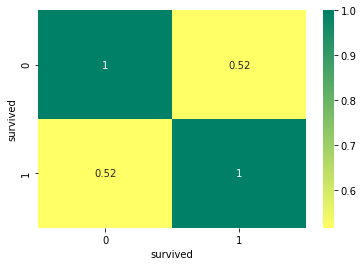

In [54]:
sns.heatmap(df3.corr(),cmap='summer_r',annot=True)

<AxesSubplot:xlabel='fare', ylabel='survived'>

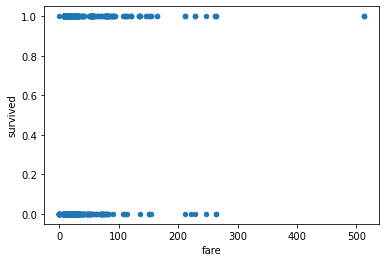

In [55]:
df.plot.scatter(x='fare',y='survived')